In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import mode
from keras.models import Model
from keras.layers import Input, BatchNormalization, LSTM, Dense
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.metrics import Precision, Recall

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import pyttsx3  # require to install espeak (sudo apt/dnf install espeak)

2023-04-18 13:38:45.888655: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 13:38:45.977416: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-18 13:38:45.978126: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-18 13:38:49.157354: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
df = pd.read_csv('../data/characters.csv')
X = df[['flex_1', 'flex_2', 'flex_3', 'flex_4', 'flex_5', 'GYRx', 'GYRy', 'GYRz', 'ACCx', 'ACCy', 'ACCz']].values
labels = df.iloc[:, -1]
label_dict = {label: i for i, label in enumerate(sorted(set(labels)))}
y = np.array([label_dict[label] for label in labels])
y = to_categorical(y, num_classes=len(label_dict))

print(label_dict)

print(X.shape, y.shape)
X = np.reshape(X, (X.shape[0]//150, 150, X.shape[1]))
y = np.reshape(y, (y.shape[0]//150, 150, y.shape[1]))
print(X.shape, y.shape)

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25}
(975000, 11) (975000, 26)
(6500, 150, 11) (6500, 150, 26)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, X_val.shape)
print(y_train.shape, y_test.shape, y_val.shape)

(4160, 150, 11) (1300, 150, 11) (1040, 150, 11)
(4160, 150, 26) (1300, 150, 26) (1040, 150, 26)


In [4]:
input_layer = Input(shape=(150, 11), name='input_layer')
batch_layer1 = BatchNormalization(name='hidden_layer1')(input_layer)
lstm_layer = LSTM(units=64, return_sequences=True, name='hidden_layer2')(batch_layer1)
batch_layer2 = BatchNormalization(name='hidden_layer3')(lstm_layer)
output_layer = Dense(units=len(label_dict), activation='softmax', name='output_layer')(batch_layer2)
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['accuracy', Precision(), Recall()])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=32)

2023-04-18 13:39:00.349878: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:39:00.354616: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:39:00.366999: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2023-04-18 13:39:00.599380: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27456000 exceeds 10% of free system memory.
2023-04-18 13:39:00.625741: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 64896000 exceeds 10% of free system memory.
2023-04-18 13:39:01.072069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:39:01.074609: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{

130/130 [==============================] - ETA: 0s - loss: 1.6681 - accuracy: 0.5173 - precision: 0.9123 - recall: 0.2572

2023-04-18 13:39:15.869497: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:39:15.872715: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:39:15.874549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

130/130 [==============================] - 17s 102ms/step - loss: 1.6681 - accuracy: 0.5173 - precision: 0.9123 - recall: 0.2572 - val_loss: 1.5143 - val_accuracy: 0.7063 - val_precision: 0.9970 - val_recall: 0.0661
Epoch 2/50
130/130 [==============================] - 12s 90ms/step - loss: 0.8577 - accuracy: 0.7174 - precision: 0.8805 - recall: 0.5429 - val_loss: 0.7816 - val_accuracy: 0.7938 - val_precision: 0.9565 - val_recall: 0.5554
Epoch 3/50
130/130 [==============================] - 12s 93ms/step - loss: 0.7192 - accuracy: 0.7567 - precision: 0.8675 - recall: 0.6296 - val_loss: 0.5983 - val_accuracy: 0.7992 - val_precision: 0.8932 - val_recall: 0.6747
Epoch 4/50
130/130 [==============================] - 11s 84ms/step - loss: 0.6927 - accuracy: 0.7480 - precision: 0.8494 - recall: 0.6422 - val_loss: 0.5148 - val_accuracy: 0.8197 - val_precision: 0.9106 - val_recall: 0.7304
Epoch 5/50
130/130 [==============================] - 11s 83ms/step - loss: 0.6515 - accuracy: 0.7630 - pr

In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 150, 11)]         0         
                                                                 
 hidden_layer1 (BatchNormali  (None, 150, 11)          44        
 zation)                                                         
                                                                 
 hidden_layer2 (LSTM)        (None, 150, 64)           19456     
                                                                 
 hidden_layer3 (BatchNormali  (None, 150, 64)          256       
 zation)                                                         
                                                                 
 output_layer (Dense)        (None, 150, 26)           1690      
                                                                 
Total params: 21,446
Trainable params: 21,296
Non-trainable p

In [6]:
results = model.evaluate(X_test, y_test)
print("Test loss:", results[0])
print("Test accuracy:", results[1])
print("Test precision:", results[2])
print("Test recall:", results[3])

41/41 [==============================] - 1s 29ms/step - loss: 0.1619 - accuracy: 0.9451 - precision: 0.9583 - recall: 0.9284
Test loss: 0.1618966907262802
Test accuracy: 0.9450512528419495
Test precision: 0.958263635635376
Test recall: 0.9284051060676575


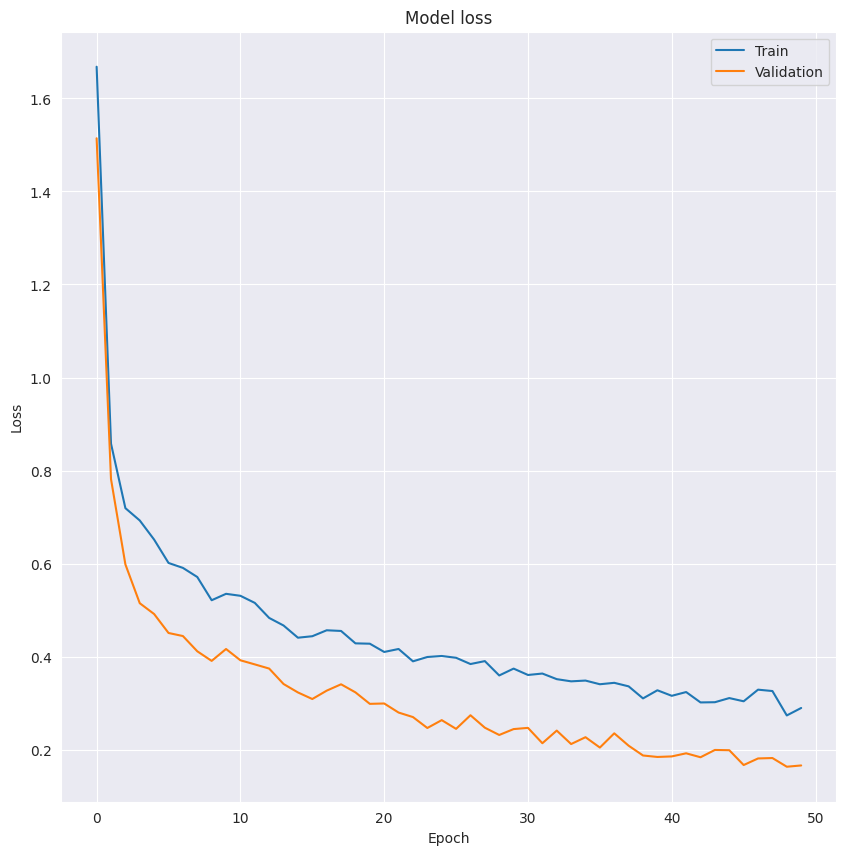

In [7]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

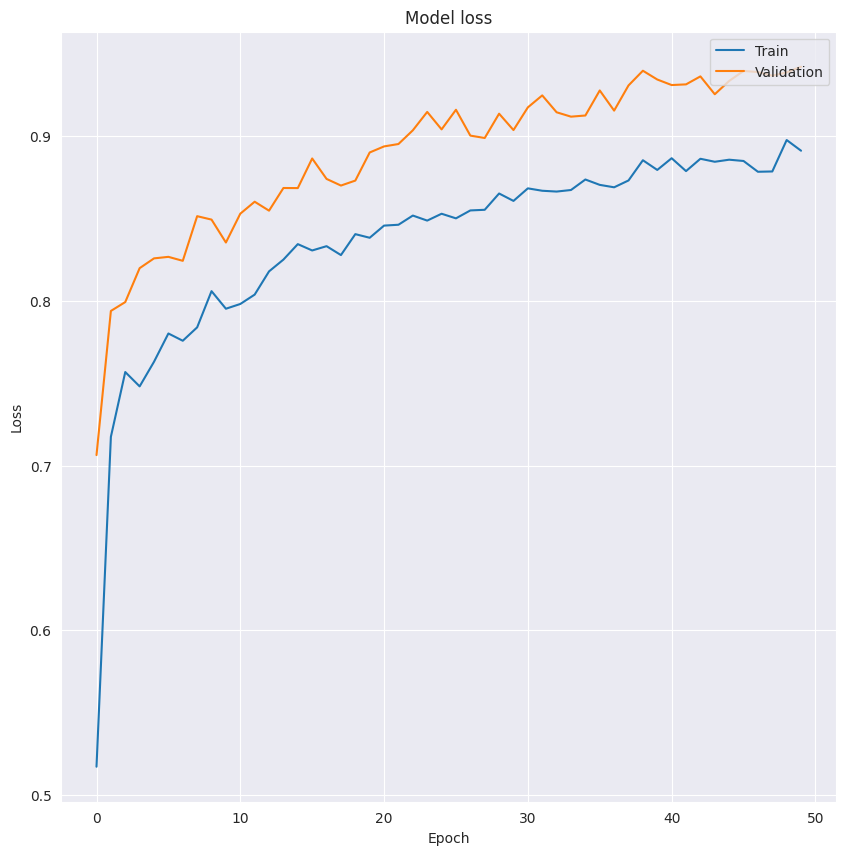

In [8]:
plt.figure(figsize=(10, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [9]:
model.save('../models/characters.h5')

In [10]:
y_pred = model.predict(X_test)
predictions = np.argmax(y_pred, axis=2)
print(predictions)
major = mode(predictions, axis=1)[0].squeeze()
count = mode(predictions, axis=1)[1].squeeze()
print(f"Predictions    : {major}")
print(f"Appeared times : {count}")

2023-04-18 13:48:06.470803: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-18 13:48:06.473884: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-18 13:48:06.476648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

41/41 [==============================] - 2s 32ms/step
[[ 8  8  8 ... 24 24 24]
 [ 2  2  2 ... 18 18 18]
 [18  4  4 ... 14  4  4]
 ...
 [11 11 11 ... 11 11 11]
 [10 10 10 ... 10 10 10]
 [ 6  6  6 ...  6  6  6]]
Predictions    : [24 18  4 ... 11 10  6]
Appeared times : [124 147 139 ... 150 150 150]


/tmp/ipykernel_4120/310183563.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  major = mode(predictions, axis=1)[0].squeeze()
/tmp/ipykernel_4120/310183563.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  count = mode(predictions, axis=1)[1].squeeze()


In [11]:
def get_key(dictionary, val):
    for key, value in dictionary.items():
        if val == value:
            return key

predictions_list = []
for word in major:
    predictions_list.append(get_key(label_dict, word))
print(predictions_list)

['y', 's', 'e', 'l', 'c', 's', 'g', 'l', 'g', 'm', 'c', 'j', 'k', 'v', 'x', 'u', 'k', 'q', 'b', 'p', 'l', 'v', 'o', 'v', 'j', 'f', 'b', 'x', 'c', 'd', 'm', 'e', 'b', 'x', 'j', 'h', 't', 't', 'g', 'm', 'k', 'j', 'y', 's', 'd', 'c', 'x', 'a', 'e', 'a', 'e', 'r', 'q', 'n', 'i', 'x', 't', 'j', 'u', 'p', 'q', 'u', 'x', 'z', 'y', 'z', 'c', 'm', 'l', 'd', 'q', 'a', 'f', 'd', 'x', 'd', 's', 'j', 't', 'n', 'i', 'm', 'r', 'w', 'z', 'd', 'q', 'f', 't', 'r', 'g', 'f', 'h', 'g', 'f', 'l', 'x', 'v', 't', 'n', 'q', 'y', 'j', 'u', 'b', 'x', 't', 'a', 'h', 'b', 'u', 'x', 'j', 'v', 'z', 'p', 'y', 'g', 's', 'm', 'w', 'p', 'b', 'w', 'r', 'e', 'u', 'q', 'm', 'n', 'i', 'i', 'v', 'c', 'p', 's', 'm', 't', 'f', 'x', 'y', 'z', 'w', 'g', 'e', 'h', 'v', 'f', 'f', 'h', 'e', 'k', 'j', 'u', 'p', 'u', 'w', 'z', 'g', 'n', 'c', 'o', 'r', 'r', 'q', 'u', 't', 'w', 'i', 'x', 'a', 'm', 'h', 'y', 'j', 'a', 'y', 'i', 'p', 'd', 'd', 'x', 'b', 'z', 'z', 'h', 'w', 'j', 'x', 's', 'e', 'p', 'x', 'v', 'x', 'i', 'y', 'a', 'k', 'g',

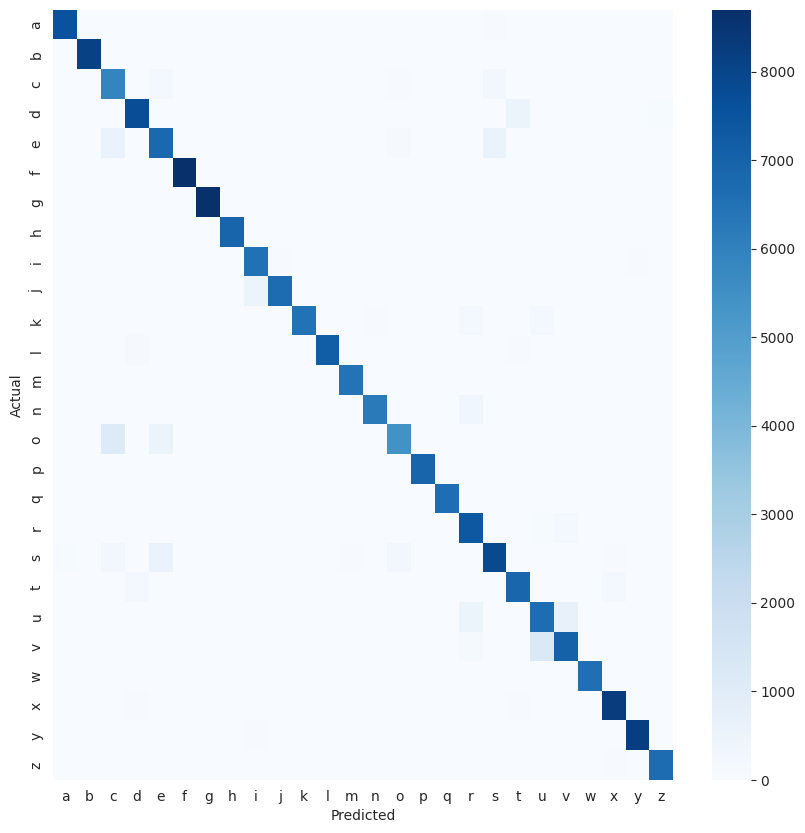

Accuracy: 94.51%


In [12]:
words_cm = confusion_matrix(y_test.argmax(axis=2).flatten(), y_pred.argmax(axis=2).flatten())
plt.subplots(figsize=(10, 10))
sns.heatmap(words_cm, cmap='Blues', xticklabels=label_dict.keys(), yticklabels=label_dict.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
accuracy = np.sum(np.diag(words_cm)) / np.sum(words_cm)
print(f"Accuracy: {accuracy*100:.2f}%")

In [13]:
print(classification_report(y_test.argmax(axis=2).flatten(), y_pred.argmax(axis=2).flatten()))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      7650
           1       1.00      1.00      1.00      8100
           2       0.74      0.92      0.82      6450
           3       0.95      0.92      0.93      8400
           4       0.85      0.84      0.84      8100
           5       1.00      1.00      1.00      8700
           6       1.00      1.00      1.00      8700
           7       1.00      1.00      1.00      6900
           8       0.92      0.98      0.95      6600
           9       0.99      0.93      0.96      7200
          10       0.99      0.94      0.96      6900
          11       1.00      0.97      0.99      7350
          12       0.99      1.00      0.99      6450
          13       0.99      0.94      0.96      6600
          14       0.91      0.77      0.83      7050
          15       1.00      1.00      1.00      6900
          16       1.00      1.00      1.00      6600
          17       0.87    

In [ ]:
engine = pyttsx3.init()
engine.say(", ".join(predictions_list))
engine.runAndWait()